# Tarea 1

In [20]:
usePackage <- function(p) 
{
  if (!is.element(p, installed.packages()[,1]))
    install.packages(p, repos = "https://cran.itam.mx/")
  suppressPackageStartupMessages(require(p, character.only = TRUE, quietly  = TRUE))
}

# Problema 1

In [21]:

#Funcion amnesia, recibe un vector x numerico
#Dos numeros t,s>0
#Regresa |P(X>s)-P(X>t+s|X>t)|

amnesia <- function(x,t,s){
    p_s <- length(x[x>s])/length(x) # P(X>s)
    n_s <- length(x[x>t])           # Número de elementos en X tal que X>t
    p_ts <- length(x[x>t+s])/n_s    #P(X>t+s|X>t)
    return (abs(p_s-p_ts))
    
}

In [22]:

X <- rexp(100,1)#Muestra aleatoria de 100 observaciones
Y <- rexp(1000000,1)#Muestra aleatoria de 1000 observaciones
t <- 0.5
s <- 2

In [23]:
#Para una muestra con 100 observaciones
amnesia(X,t,s)

[1] 0.03548387

In [24]:
#Para una muestra con 1000,000 observaciones
amnesia(Y,t,s)

[1] 0.0004485756

Para ninguna de las dos muestras $\mathbb{P}(X>t+s|X>t)=\mathbb{P}(X>s)$.

Sin embargo, la muestra con 1000,000 de observaciones tiene un error menor.

A continuación la solución exacta:
$\mathbb{P}(X>s)= 1-\mathbb{P}(X\leq s) = 1-F_{x}(s)$

In [25]:
#Probabilidad real
1-pexp(s,1)

[1] 0.1353353

In [26]:
#Probabilidad dada por la muestra de tamaño 100
length(X[X>s])/length(X)

[1] 0.1

In [27]:
#Probabilidad dada por la muestra tamaño 1000,000
length(Y[Y>s])/length(Y)

[1] 0.135776

Es mejor la aproximación dada por la muestra de tamaño 1000,000.

# Problema 2 

In [28]:
usePackage('Rlab')

In [29]:
#Generamos 500 observaciones bernoulli con p = 1/2
#Asociamos un 1 al éximo "cae sol en el lanzamiento de la moneda"
N <- 500
x <- rbern(N, 0.5)
#Calculamos ahora la proporcion de soles en cada tiro
proporcion_soles <- cumsum(x)/1:N

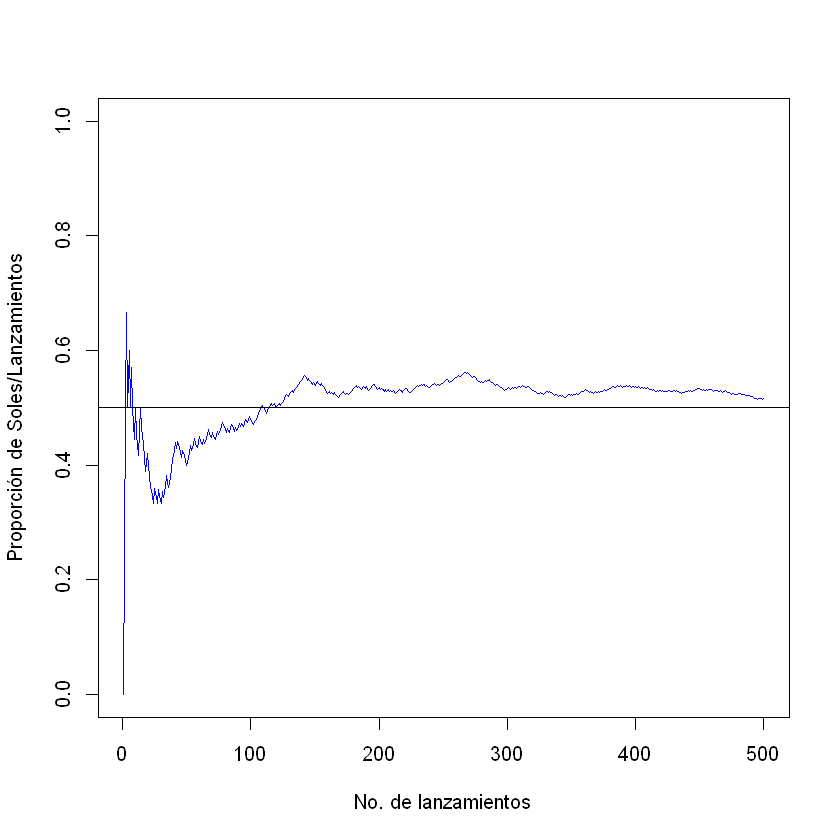

In [41]:
#Realizamos la gráfica
plot(1:N,proporcion_soles,type = 'l',ylim =c(0,1),xlab = 'No. de lanzamientos',
     ylab = 'Proporción de Soles/Lanzamientos',col = 'blue')
abline(h=0.5)

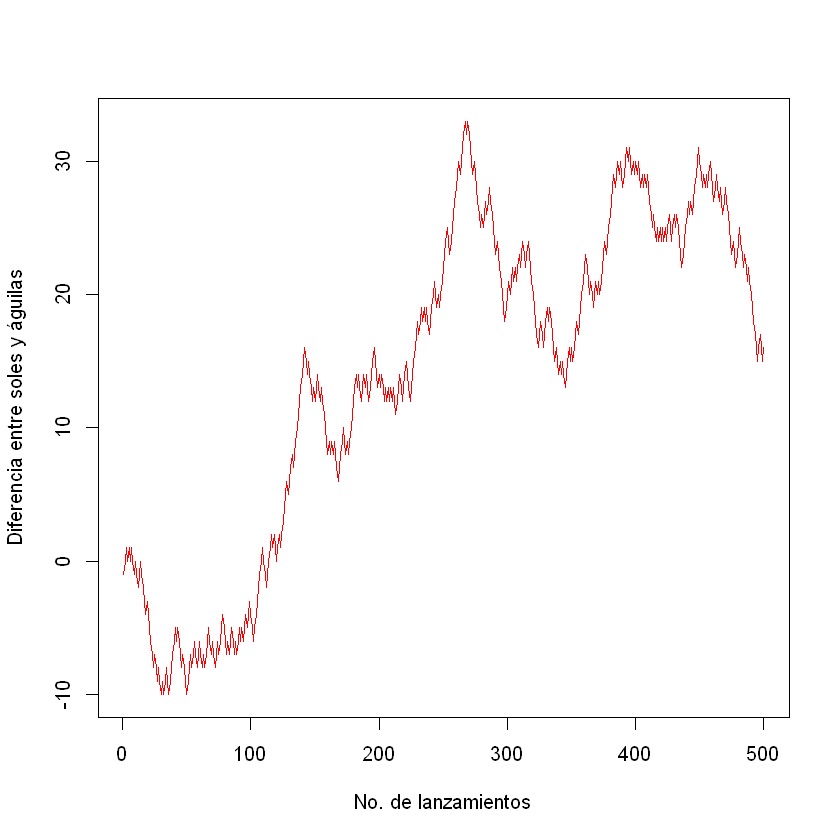

In [42]:
#Calculemos ahora la diferencia entre soles y águilas
difsoles_aguilas <- 2*cumsum(x)-1:N
#Realizamos la gráfica
plot(1:N,difsoles_aguilas,type = 'l',xlab = 'No. de lanzamientos',
     ylab = 'Diferencia entre soles y águilas',col = 'red')



La tendencia general parece poder ser descrita por una linea recta, es decir, que si $Y=\#Soles-\#Águilas$, entonces ocurre que
$\frac{\Delta Y}{\Delta n}$ y entonces $\frac{\Delta \#Soles}{\Delta n}$ y $\frac{\Delta \#Águilas}{\Delta n}$ difieren por una constante

# Problema 3

Una canoa que contiene tres mujeres y tres hombres llega a una isla deshabitada.
Discutan la información que requieren para modelar la sociedad de estos individuos
y cómo el tamaño de la población crece con el tiempo. Por ejemplo, pueden hacer
supuestos como los siguientes y hacer modificaciones para ver cómo cambiarían
las proyecciones que hagan:

Todas las personas son adultos (digamos 20 años todos). La edad de las mujeres es importante para el tema de capacidad reproductiva.

Las parejas se determinan al inicio y no hay cambios de pareja a lo largo del
tiempo

Cada pareja puede tener una bebé al año con probabilidad p, y éste sobrevive
con probabilidad w.


Podemos hacer los siguientes supuestos:

- Todas las personas se encuentran en edad reproductiva
- Que una pareja tenga un hijo o no es independiente del resto de las parejas

Sea $X$ la cantidad de hijos que las tres parejas pueden tener, entonces $X$ se distribuye $Bin(3,\frac{1}{2})$

# Prboblema 6

Función para obtener $Z_n$ a partir de $Z_{n-1}$ en el método del cuadrado medio de John von Neumann

In [14]:


Z_n <- function(Z_0){
    x <- Z_0^2
    x <- as.character(x)
    x <- as.numeric(unlist(strsplit(x, "")))
    if(length(x)==4){
        #4321
        Z_n <- x[2]*10+x[3] #32
    }else{
        
        if(length(x)==3){
            #0-321
            Z_n <- x[1]*10+x[2]#32
        }else{
            if(length(x)==2){
                #00-21
                Z_n <- x[1]#02
            }else{
                #000-1
                Z_n<-0
            }
        }
    }
    return(Z_n)
    


}

[1] 8